In [5]:
#import required libraries 
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# cv2.cvtColor is an OpenCV function to convert images to different color spaces
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [12]:
def detect_faces(f_cascade, colored_img, scaleFactor=1.1, minNeighbors=5):
    #just making a copy of image passed, so that passed image is not changed 
    img_copy = colored_img.copy()          

    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          

    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors)
    print('faces detected: ', len(faces))

    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)              

    return img_copy

# 作業: 
1. 使用faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5); 
修改 scaleFactor, minNeighbor兩個參數計算 test5.jpg 有幾張臉

2. load cascade classifier training file for haarcascade 
3. load cascade classifier training file for lbpcascade 


In [14]:
#load test iamge
test1 = cv2.imread('../Data/test5.JPG')
#convert the test image to gray image as opencv face detector expects gray images 
gray_img = convertToRGB(test1)

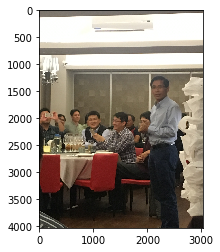

In [15]:
plt.imshow(gray_img, cmap='gray')

In [16]:
#load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier('../Data/haarcascade_frontalface_alt.xml')

faces detected:  7


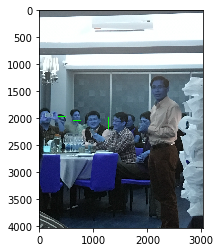

In [20]:
faces_detected_img = detect_faces(haar_face_cascade, gray_img, scaleFactor=1.5,  minNeighbors=1)
plt.imshow(convertToRGB(faces_detected_img))

faces detected:  5


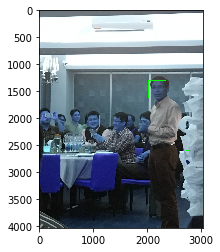

In [22]:
haar_face_cascade = cv2.CascadeClassifier('../Data/lbpcascade_frontalface.xml')
faces_detected_img = detect_faces(haar_face_cascade, gray_img, scaleFactor=1.2,  minNeighbors=3)
plt.imshow(convertToRGB(faces_detected_img))